In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, MultiPolygon
from shapely.wkt import loads
from toolbox import *

# Read Dataset

In [2]:
# Read the data
df = pd.concat([pd.read_csv(f"Data/Traffic_Crashes_{i}.csv") for i in range(8)], ignore_index=True)

# Data Description

In [3]:
print(f"# of observations: {df.shape[0]}, # of features: {df.shape[1]}")

# of observations: 799526, # of features: 48


In [4]:
pd.set_option('display.max_columns', None)
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"$501 - $1,500",08/18/2023 06:01:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,3422,N,LONG AVE,1633.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,NaN,CURVE ON GRADE,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",11/26/2019 08:38:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,5,W,TERMINAL ST,1655.0,Y,Y,NaN,NaN,NaN,NaN,2,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",08/18/2023 10:48:00 AM,FOLLOWING TOO CLOSELY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3,W,TERMINAL ST,1653.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [5]:
df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,799526.000000,1.990060e+05,799526.000000,799521.000000,799526.000000,797771.000000,797771.000000,797771.000000,797771.000000,797771.000000,797771.000000,797771.0,799526.000000,799526.000000,799526.000000,794081.000000,794081.000000
mean,28.403780,1.333032e+01,3688.695708,1243.135123,2.034823,0.189443,0.001187,0.019997,0.106981,0.061278,2.004076,0.0,13.201700,4.123786,6.756523,41.854820,-87.673497
std,6.177193,2.961623e+03,2888.049772,705.252405,0.452526,0.565504,0.037333,0.165503,0.421910,0.318553,1.158045,0.0,5.568989,1.980238,3.423399,0.336628,0.684215
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1249.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782440,-87.721733
50%,30.000000,2.000000e+00,3201.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874778,-87.674114
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924350,-87.633304
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


# Preprocessing

## Removing identifiers
Removing the identifier of this dataset, which is "**CRASH_RECORD_ID**".

In [6]:
df.drop(columns=['CRASH_RECORD_ID'], inplace=True)

## Handling date time variables
Deviding the variable "**CRASH_DATE**" into separete date time variables: "**CRASH_DATE_year**", "**CRASH_DATE_month**", "**CRASH_DATE_day**", "**CRASH_DATE_hour**", "**CRASH_DATE_minute**", "**CRASH_DATE_second**"

In [7]:
df = datetime_transformer(df, ["CRASH_DATE"])

## Dropping some features
* Dropping some features which seem not to be the factors in traffic crashes: "**REPORT_TYPE**", "**DATE_POLICE_NOTIFIED**", "**PHOTOS_TAKEN_I**", "**STATEMENTS_TAKEN_I**". 
* Dropping some redundant features: "**CRASH_HOUR**", "**CRASH_MONTH**".

In [8]:
# drop irrelevant features
df.drop(columns=["REPORT_TYPE", "DATE_POLICE_NOTIFIED", "PHOTOS_TAKEN_I", "STATEMENTS_TAKEN_I"], inplace=True)

# drop redundant features
df.drop(columns=["CRASH_HOUR", "CRASH_MONTH"], inplace=True)

## Handling missing value

In [9]:
# show features with missing values and its counts and percentage
miss_num = df.isna().sum()[df.isna().sum() > 0]
miss_ratio = miss_num * 100 / df.shape[0]
df_miss = pd.DataFrame(data=[miss_num, miss_ratio], index=["# of missing value", "Percentage of missing value"]).T
df_miss

,# of missing value,Percentage of missing value
CRASH_DATE_EST_I,739619.0,92.507186
LANE_CNT,600520.0,75.109502
INTERSECTION_RELATED_I,616234.0,77.074917
NOT_RIGHT_OF_WAY_I,762606.0,95.382264
HIT_AND_RUN_I,549515.0,68.730098
STREET_DIRECTION,4.0,0.000500
STREET_NAME,1.0,0.000125
BEAT_OF_OCCURRENCE,5.0,0.000625
DOORING_I,797060.0,99.691567
WORK_ZONE_I,794912.0,99.422908


In [10]:
# drop columns with more than 50% missing values
df.drop(columns=miss_ratio[miss_ratio > 50].index, inplace=True)

# drop rows with missing value
df.dropna(axis=0, inplace=True)

## Removing constant features
Removing constant features, which means features with only one value.

In [11]:
# remove constant features
const_features = df.nunique()[df.nunique()==1].index
df.drop(columns=const_features, inplace=True)

## Removing unreliable observations

In [14]:
for feature in ["CRASH_DATE_year", "CRASH_DATE_month", "CRASH_DATE_day", "CRASH_DATE_hour", "CRASH_DATE_minute"]:
    print(feature, f"min: {df[feature].min()}", f"max: {df[feature].max()}")

CRASH_DATE_year min: 2013 max: 2024
CRASH_DATE_month min: 1 max: 12
CRASH_DATE_day min: 1 max: 31
CRASH_DATE_hour min: 0 max: 23
CRASH_DATE_minute min: 0 max: 59


Acording to the data source website, this data was started collecting from 2015. Therefore, the observations with CRASH_DATE_year < 2015 are removed.

In [15]:
df.drop(index=df[(df.CRASH_DATE_year==2013) | (df.CRASH_DATE_year==2014)].index, inplace=True)

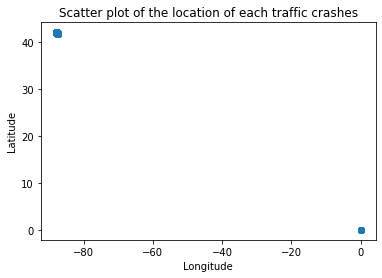

In [16]:
plt.scatter(df.LONGITUDE, df.LATITUDE)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter plot of the location of each traffic crashes")
plt.show()

Chicago is a city in the U.S., so the data in the bottom right in the above graph have errors in their location information.

In [17]:
df.drop(index=df[df.LATITUDE < 10].index, inplace=True)

## Feature Engineering
* Creating the target variable "**Severity**" from "**INJURIES_TOTAL**" and "**INJURIES_FATAL**".  
* "Severity" has three levels:  
    * 3: "INJURIES_TOTAL" $>=3$ or "INJURIES_FATAL" $>= 1$  
    * 2: $1<=$ "INJURIES_TOTAL" $<=2$  
    * 1: "INJURIES_TOTAL" $=0$

In [18]:
df = create_severity(df)

* Creating a new feature, which value is community area name in the city of Chicago

In [19]:
# read community area data
df_comm = pd.read_csv("Data/CommAreas.csv")

# convert the data type of 'the_geom' into the appropriate type: Multipolygon 
df_comm['the_geom'] = df_comm['the_geom'].apply(loads)

# Create Point object
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

series_comm = pd.Series([np.nan]*gdf.shape[0], index=gdf.index)
gdf_geom = gdf.geometry
df_comm_geom = gpd.GeoSeries(df_comm.the_geom)
for i in range(gdf.shape[0]):
    temp = df_comm_geom.contains(gdf_geom.iloc[i])
    if np.any(temp):
        series_comm.iloc[i] = df_comm.COMMUNITY[temp[temp==True].index[0]]
        
df["Community_area"] = series_comm

## Removing observations outside of Chicago city
* Removing observations in which the traffic crashes occured outside of Chicago city

In [20]:
# show the number of observations outside of Chicago city
df.Community_area.isna().sum()

344

In [21]:
# remove observations outside of Chicago city
df.dropna(axis=0, inplace=True)

## Reducing demension
### Removing features obtained after the crash
* Independent variables should not contain features which can be obtained after the traffic crash. Therefore, the following features are removed: "CRASH_TYPE", "DAMAGE", "MOST_SEVERE_INJURY", "INJURIES_TOTAL", "INJURIES_FATAL", "INJURIES_INCAPACITATING", "INJURIES_NON_INCAPACITATING", "INJURIES_REPORTED_NOT_EVIDENT", "INJURIES_NO_INDICATION".

In [22]:
removed_features = ["CRASH_TYPE", "DAMAGE", "MOST_SEVERE_INJURY", "INJURIES_TOTAL", "INJURIES_FATAL", 
                    "INJURIES_INCAPACITATING", "INJURIES_NON_INCAPACITATING", "INJURIES_REPORTED_NOT_EVIDENT", 
                    "INJURIES_NO_INDICATION"]
df.drop(columns=removed_features, inplace=True)

### Removing some location data
* This dataset contains various location features. In the course of building models, I will only use "LATITUDE", "LONGITUDE", and "Community_area" as the locational data. Therefore, the following features are removed: "STREET_NO", "STREET_NAME", "BEAT_OF_OCCURRENCE", "LOCATION".

In [23]:
removed_features = ["STREET_NO", "STREET_NAME", "BEAT_OF_OCCURRENCE", "LOCATION"]
df.drop(columns=removed_features, inplace=True)

In [24]:
df.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,NUM_UNITS,CRASH_DAY_OF_WEEK,LATITUDE,LONGITUDE,CRASH_DATE_year,CRASH_DATE_month,CRASH_DATE_day,CRASH_DATE_hour,CRASH_DATE_minute,Severity,Community_area
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",S,4,7,41.854120,-87.665902,2023,7,29,14,45,1,LOWER WEST SIDE
2,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,N,2,6,41.942976,-87.761883,2023,8,18,17,58,2,PORTAGE PARK
13,10,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,ANGLE,PARKING LOT,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,UNABLE TO DETERMINE,NOT APPLICABLE,E,2,7,41.809781,-87.594213,2023,7,29,14,30,1,KENWOOD
14,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DARKNESS,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,UNABLE TO DETERMINE,NOT APPLICABLE,N,2,7,41.899225,-87.696642,2023,7,29,0,50,1,WEST TOWN
20,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO SIDE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,IMPROPER BACKING,NOT APPLICABLE,S,2,4,41.744152,-87.585945,2023,9,20,12,57,1,AVALON PARK


# EDA

In [ ]:
# df[(df.TRAFFIC_CONTROL_DEVICE=="UNKNOWN") | 
#    (df.DEVICE_CONDITION=="UNKNOWN") | 
#    (df.WEATHER_CONDITION=="UNKNOWN") | 
#    (df.LIGHTING_CONDITION=="UNKNOWN") |
#    (df.ROADWAY_SURFACE_COND=="UNKNOWN") |
#    (df.ROAD_DEFECT=="UNKNOWN")].shape[0] / df.shape[0]

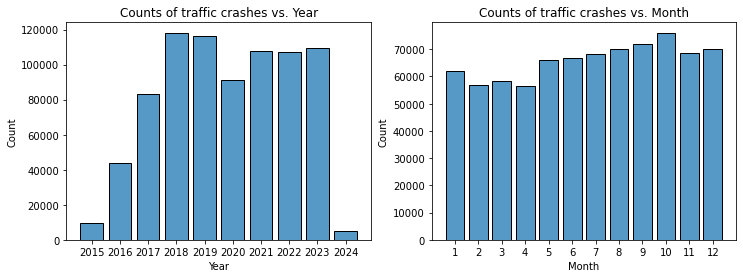

In [25]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))
sns.histplot(df.CRASH_DATE_year, discrete=True, shrink=0.8, ax=axes[0])
axes[0].set_xticks(range(2015, 2025))
axes[0].set_xlabel("Year")
axes[0].set_title("Counts of traffic crashes vs. Year")
sns.histplot(df.CRASH_DATE_month, discrete=True, shrink=0.8, ax=axes[1])
axes[1].set_xticks(range(1, 13))
axes[1].set_xlabel("Month")
axes[1].set_title("Counts of traffic crashes vs. Month")
plt.show()

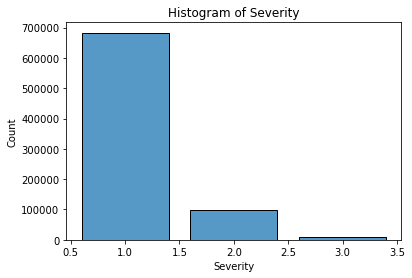

In [27]:
sns.histplot(df.Severity, discrete=True, shrink=0.8)
plt.title("Histogram of Severity")
plt.show()

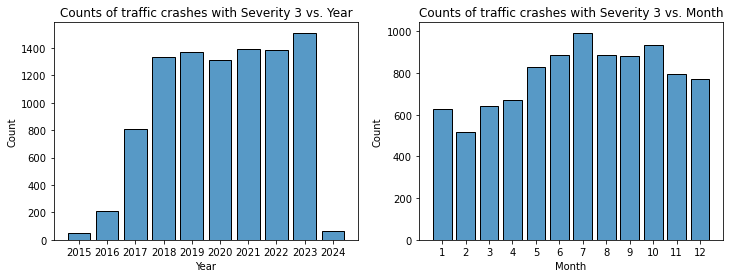

In [28]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))
sns.histplot(df[df.Severity == 3].CRASH_DATE_year, discrete=True, shrink=0.8, ax=axes[0])
axes[0].set_xticks(range(2015, 2025))
axes[0].set_xlabel("Year")
axes[0].set_title("Counts of traffic crashes with Severity 3 vs. Year")
sns.histplot(df[df.Severity == 3].CRASH_DATE_month, discrete=True, shrink=0.8, ax=axes[1])
axes[1].set_xticks(range(1, 13))
axes[1].set_xlabel("Month")
axes[1].set_title("Counts of traffic crashes with Severity 3 vs. Month")
plt.show()

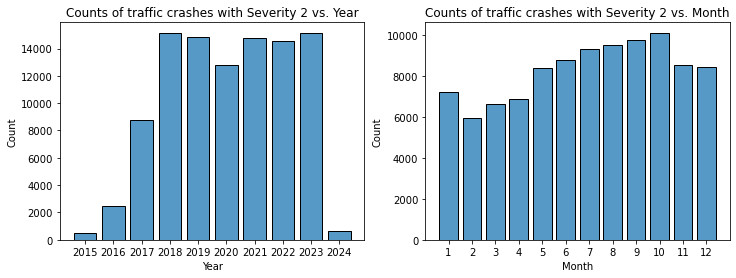

In [29]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))
sns.histplot(df[df.Severity == 2].CRASH_DATE_year, discrete=True, shrink=0.8, ax=axes[0])
axes[0].set_xticks(range(2015, 2025))
axes[0].set_xlabel("Year")
axes[0].set_title("Counts of traffic crashes with Severity 2 vs. Year")
sns.histplot(df[df.Severity == 2].CRASH_DATE_month, discrete=True, shrink=0.8, ax=axes[1])
axes[1].set_xticks(range(1, 13))
axes[1].set_xlabel("Month")
axes[1].set_title("Counts of traffic crashes with Severity 2 vs. Month")
plt.show()

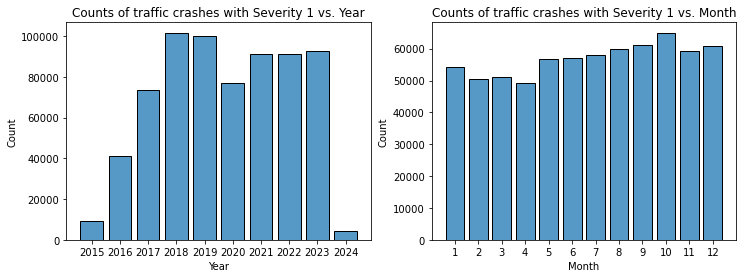

In [30]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))
sns.histplot(df[df.Severity == 1].CRASH_DATE_year, discrete=True, shrink=0.8, ax=axes[0])
axes[0].set_xticks(range(2015, 2025))
axes[0].set_xlabel("Year")
axes[0].set_title("Counts of traffic crashes with Severity 1 vs. Year")
sns.histplot(df[df.Severity == 1].CRASH_DATE_month, discrete=True, shrink=0.8, ax=axes[1])
axes[1].set_xticks(range(1, 13))
axes[1].set_xlabel("Month")
axes[1].set_title("Counts of traffic crashes with Severity 1 vs. Month")
plt.show()

In [31]:
# read Chicago map data
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))

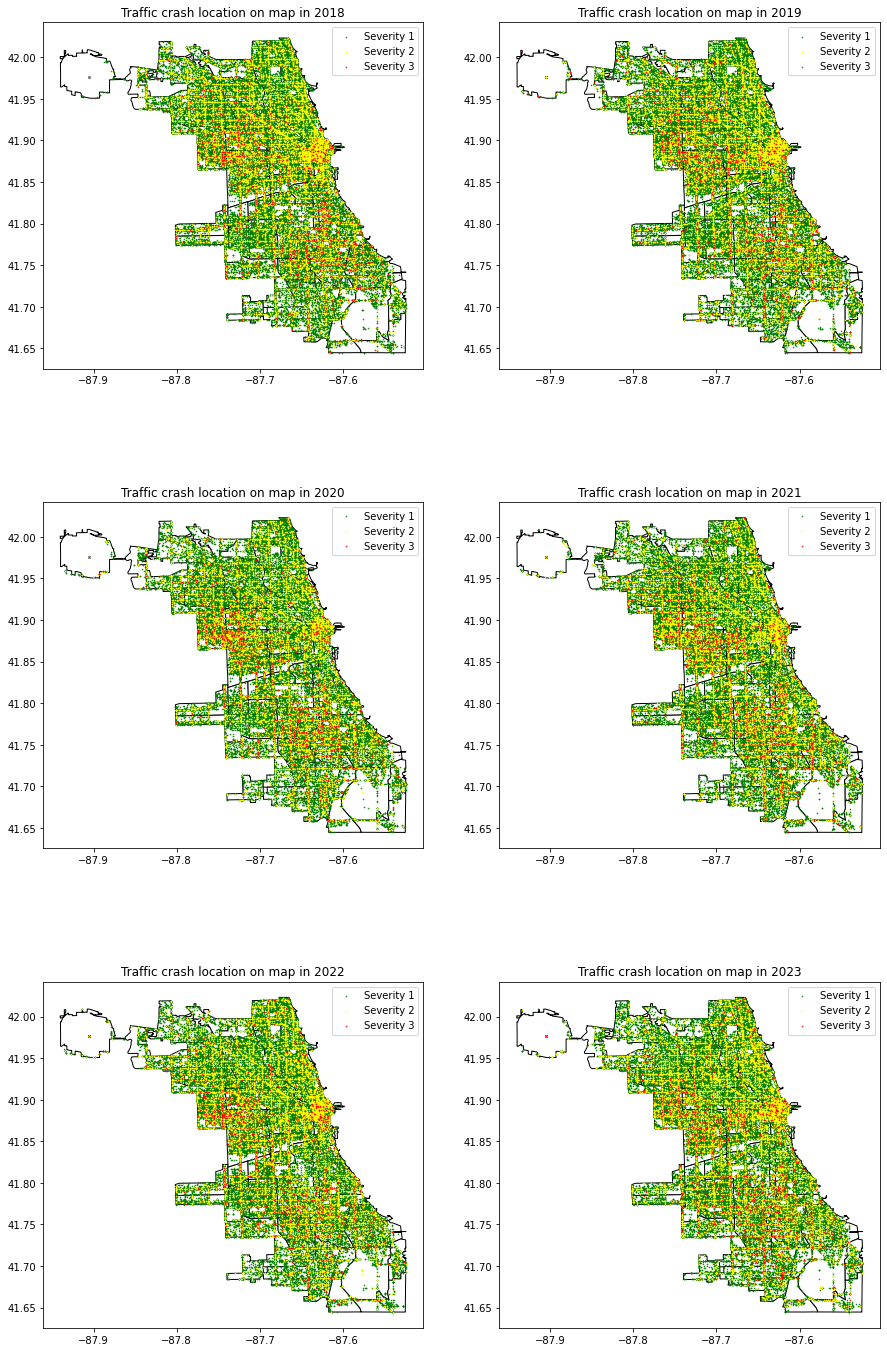

In [32]:
fig, axes = plt.subplots(3,2, figsize=(15, 25))
for year in [2018, 2019, 2020, 2021, 2022, 2023]:
    i, j = (year-2018)//2, (year-2018)%2
    chicago.plot(ax=axes[i][j], color='white', edgecolor='black')
    gdf[(gdf.CRASH_DATE_year==year) & (gdf.Severity==1)].plot(ax=axes[i][j], color='green', markersize=0.3, label="Severity 1")
    gdf[(gdf.CRASH_DATE_year==year) & (gdf.Severity==2)].plot(ax=axes[i][j], color='yellow', markersize=0.3, label="Severity 2")
    gdf[(gdf.CRASH_DATE_year==year) & (gdf.Severity==3)].plot(ax=axes[i][j], color='red', markersize=0.3, label="Severity 3")
    axes[i][j].legend()
    axes[i][j].set_title(f"Traffic crash location on map in {year}")
plt.show()